In [2]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# loading Data

In [3]:

df=pd.read_csv('movie_metadata.csv')

# Previewing Data

In [4]:
df.head(100) 


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000


In [5]:
df.shape 

(5043, 28)

# Duration vs. Gross
## Neither short nor long movies have a high gross. Medium length movies tend to do better

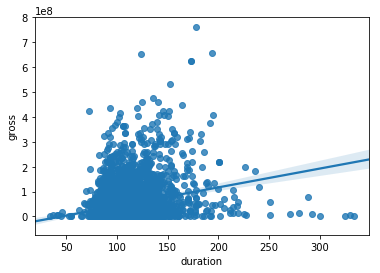

In [6]:
sns.regplot('duration', 'gross', data = df) #Checking relation between Duration and gross

# imdb_score vs.gross
#### Higher imdb_score tend to produce higher gross compared to low imdb_score movies.

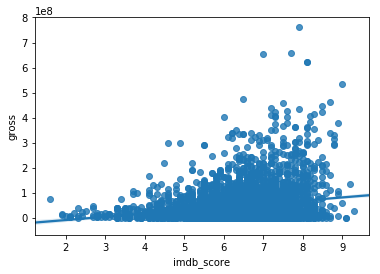

In [7]:
sns.regplot('imdb_score', 'gross', data = df) #Checking relation brtween imdb_score and gross

# imdb_score vs. gross
#### Movies with imdb_score between 8 and 9 tend to have a higher gross.

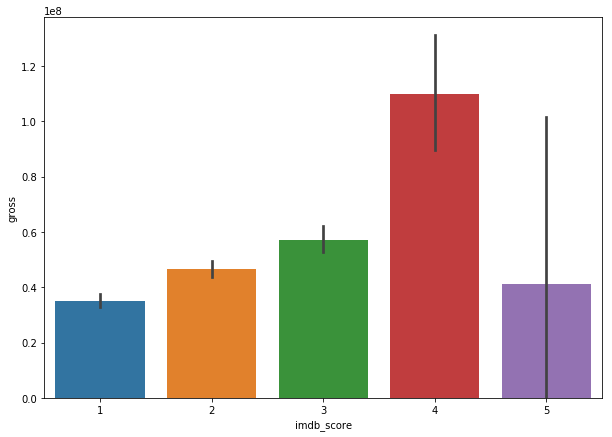

In [51]:
plt.figure(figsize=(10,7))
sns.barplot('imdb_score', 'gross', data = df)

## Checking data types and no.of input per column

In [9]:
df.info() # Checking data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

## Finding no. of missing values in each column

In [10]:
df.isnull().sum() #Checking no. of missing values for each column

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

## describing numerical data

In [11]:
df.describe() #

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


## Correlation between different features

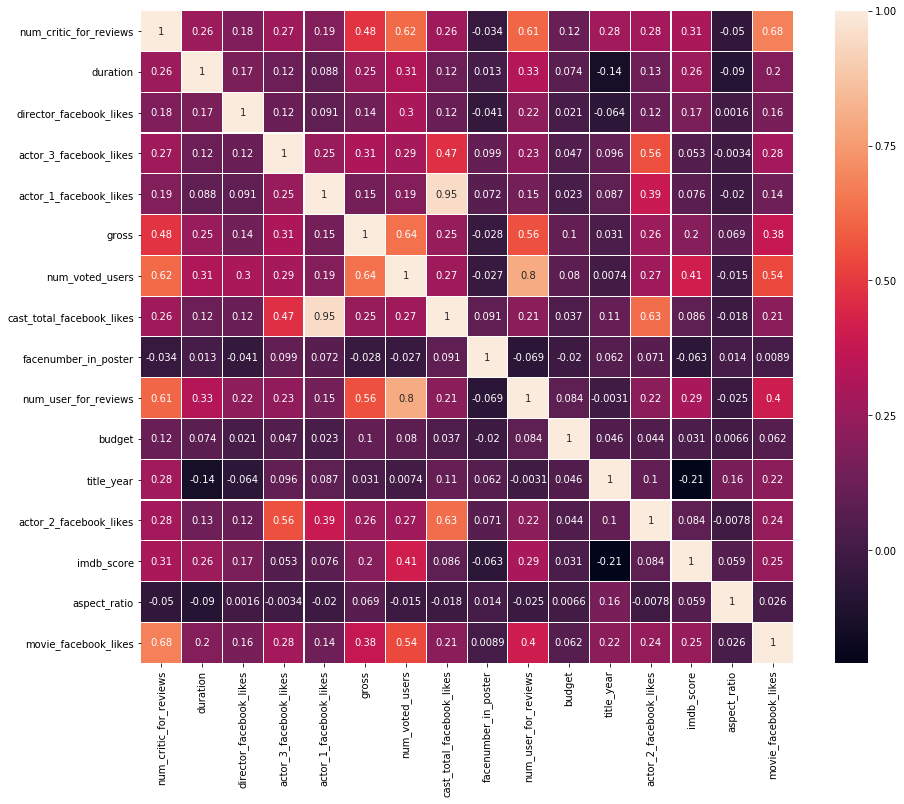

In [12]:

plt.figure(figsize=(15,12))
corr=df.corr()
sns.heatmap(corr,linewidths=0.1,vmax=1.0, square=True, linecolor='white', annot=True)

## Movies no. Countrywise
#### Few countries have more movies data for us than other such as Austrailia,Canada,France, UK,USA,Germany

In [13]:
df.groupby('country').size() 

country
Afghanistan                1
Argentina                  4
Aruba                      1
Australia                 55
Bahamas                    1
Belgium                    4
Brazil                     8
Bulgaria                   1
Cambodia                   1
Cameroon                   1
Canada                   126
Chile                      1
China                     30
Colombia                   1
Czech Republic             3
Denmark                   11
Dominican Republic         1
Egypt                      1
Finland                    1
France                   154
Georgia                    1
Germany                   97
Greece                     2
Hong Kong                 17
Hungary                    2
Iceland                    3
India                     34
Indonesia                  1
Iran                       4
Ireland                   12
                        ... 
Libya                      1
Mexico                    17
Netherlands                5
New Li

## Categorizing Movies based on imdb_score(on scale of 1 to 5; 1:<=5,6<2<=7,7<3<=8,8<=4<9,9<5)

In [14]:

df.loc[df['imdb_score']<=6,'imdb_score']=1
df.loc[(df['imdb_score']>6)&(df['imdb_score']<=7),'imdb_score']=2
df.loc[(df['imdb_score']>7)&(df['imdb_score']<=8),'imdb_score']=3
df.loc[(df['imdb_score']>8)&(df['imdb_score']<=9),'imdb_score']=4
df.loc[(df['imdb_score']>9),'imdb_score']=5
df['imdb_score']=df['imdb_score'].astype(int)
df['imdb_score'].head()

0    3
1    3
2    2
3    4
4    3
Name: imdb_score, dtype: int64

## Countplot of imdb_score
#### Very few movies have a imdb_score greater than 8. Most movies have a rating between 6 and 7

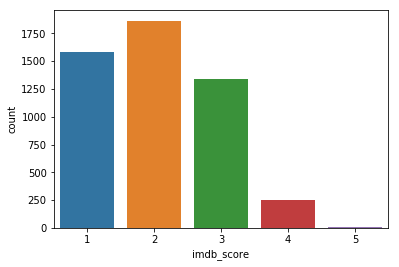

In [15]:
df.groupby('imdb_score').size() #No. of movies per Category
sns.countplot(df.imdb_score)

## Filling the missing values of budget and dividing budget data into two parts with a new variable

In [16]:

df.budget.fillna(df.budget.mean(),inplace=True) #
df.loc[df['budget']<=100000000,'budget1']=1
df.loc[(df['budget']>10000000),'budget1']=2
df.budget=df.budget.astype(int)
df.budget.head()

0    237000000
1    300000000
2    245000000
3    250000000
4     39752620
Name: budget, dtype: int64

In [17]:
df[df['budget1']==2] # Validating the new variable oF budget

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,budget1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,English,USA,PG-13,237000000,2009.0,936.0,3,1.78,33000,2.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,English,USA,PG-13,300000000,2007.0,5000.0,3,2.35,0,2.0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,English,UK,PG-13,245000000,2015.0,393.0,2,2.35,85000,2.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,English,USA,PG-13,250000000,2012.0,23000.0,4,2.35,164000,2.0
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,39752620,NaN,12.0,3,NaN,0,2.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,263700000,2012.0,632.0,2,2.35,24000,2.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,English,USA,PG-13,258000000,2007.0,11000.0,2,2.35,0,2.0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,English,USA,PG,260000000,2010.0,553.0,3,1.85,29000,2.0
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,English,USA,PG-13,250000000,2015.0,21000.0,3,2.35,118000,2.0
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,English,UK,PG,250000000,2009.0,11000.0,3,2.35,10000,2.0


## no.of movies in each category of budget1(1000000000)

In [18]:
df.groupby('budget1').size() 

budget1
1.0    1592
2.0    3451
dtype: int64

## Comparing budget and gross values

In [19]:
compare=df[['budget','gross']] 

In [20]:
compare.head()

,budget,gross
0,237000000,760505847.0
1,300000000,309404152.0
2,245000000,200074175.0
3,250000000,448130642.0
4,39752620,NaN


## Scaling budget and gross values for simplification

In [21]:
df.scaled_budget=df['budget']/1000000 
print(df.scaled_budget.head())
df.scaled_gross=df['gross']/1000000
df.scaled_gross.head()

0    237.00000
1    300.00000
2    245.00000
3    250.00000
4     39.75262
Name: budget, dtype: float64


/home/aditya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/aditya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


0    760.505847
1    309.404152
2    200.074175
3    448.130642
4           NaN
Name: gross, dtype: float64

/home/aditya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/aditya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 100)

<Figure size 1080x864 with 0 Axes>

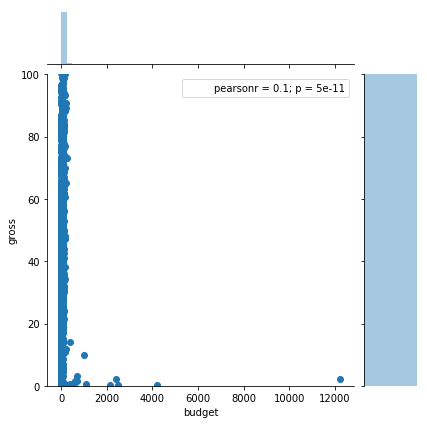

In [52]:
plt.figure(figsize=(15,12))
sns.jointplot(df.scaled_budget,df.scaled_gross) #jointplot for scaledbudget and scaled gross
plt.xlim(0,100)
plt.ylim(0,100)


## no. of unique values in each column

In [23]:
df.nunique() 

color                           2
director_name                2398
num_critic_for_reviews        528
duration                      191
director_facebook_likes       435
actor_3_facebook_likes        906
actor_2_name                 3032
actor_1_facebook_likes        878
gross                        4035
genres                        914
actor_1_name                 2097
movie_title                  4917
num_voted_users              4826
cast_total_facebook_likes    3978
actor_3_name                 3521
facenumber_in_poster           19
plot_keywords                4760
movie_imdb_link              4919
num_user_for_reviews          954
language                       47
country                        65
content_rating                 18
budget                        440
title_year                     91
actor_2_facebook_likes        917
imdb_score                      5
aspect_ratio                   22
movie_facebook_likes          876
budget1                         2
dtype: int64

# regression plot for scaled gross and scaled budget
### Generally lower budget movies have a low gross and higher budget movies have a high gross but low budget movies can have average to high gross

(0, 800)

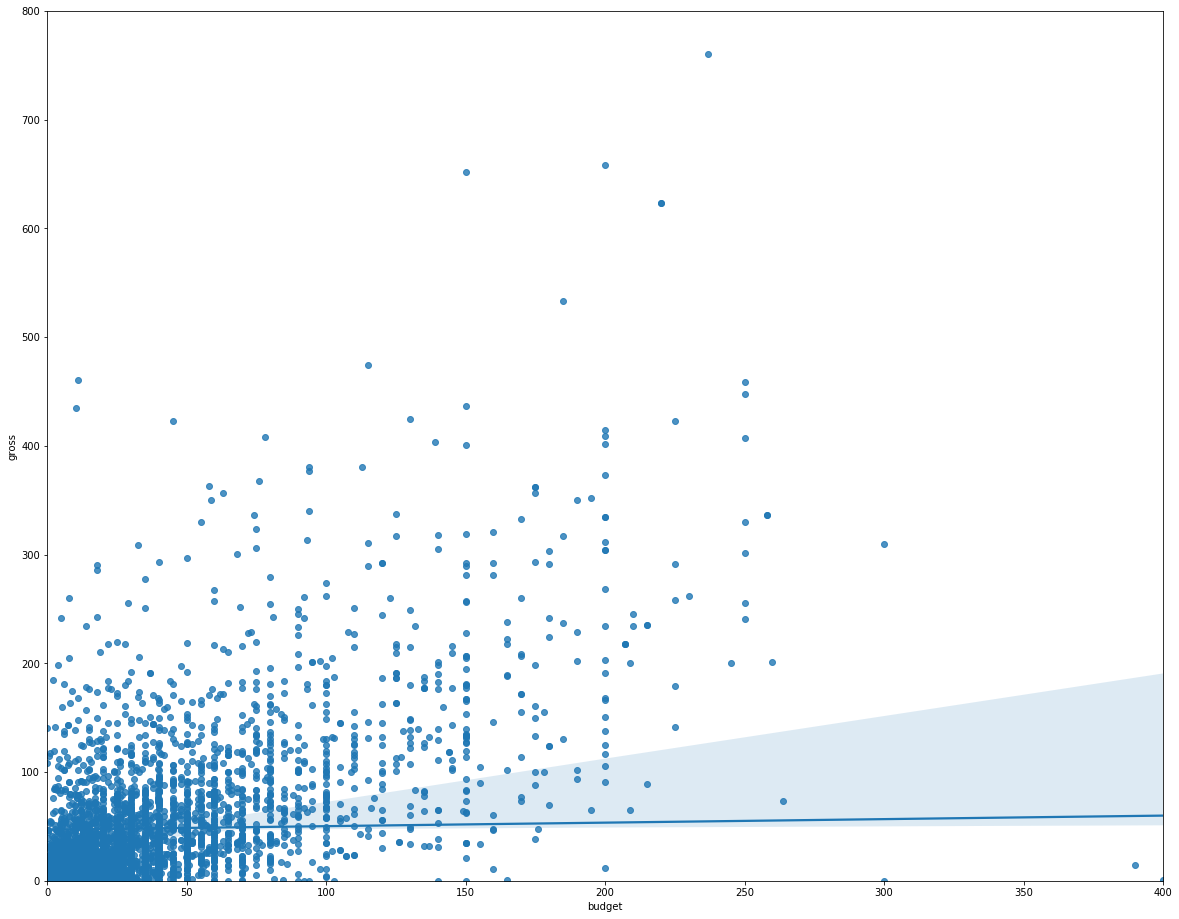

In [24]:
plt.figure(figsize=(20,16)) 
sns.regplot(df.scaled_budget,df.scaled_gross,)
plt.xlim(0,400)
plt.ylim(0,800)

# gross vs imdb_score
###  movies with higher imdb_score have higher gross(especially 8 to 9). But suddenly movies with highest imdb_score have a low gross beacuse of being more informative rather than being entertaining. Low Imdb_score generally results in low gross.

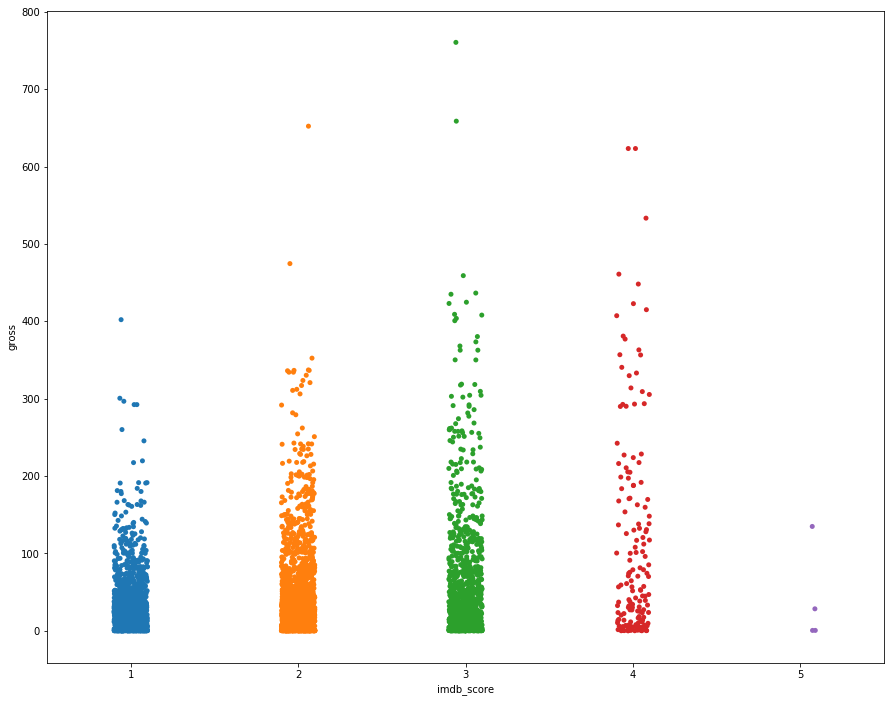

In [25]:
plt.figure(figsize=(15,12)) #classification of scaled gross values on imdb_score
sns.stripplot(df.imdb_score,df.scaled_gross,jitter=True)

## scaled_budget vs. imdb_score
#### high budget does not guarantee a high imdb_score. Interstingly movies with highest imdb_score have lowest budget. 

(0, 800)

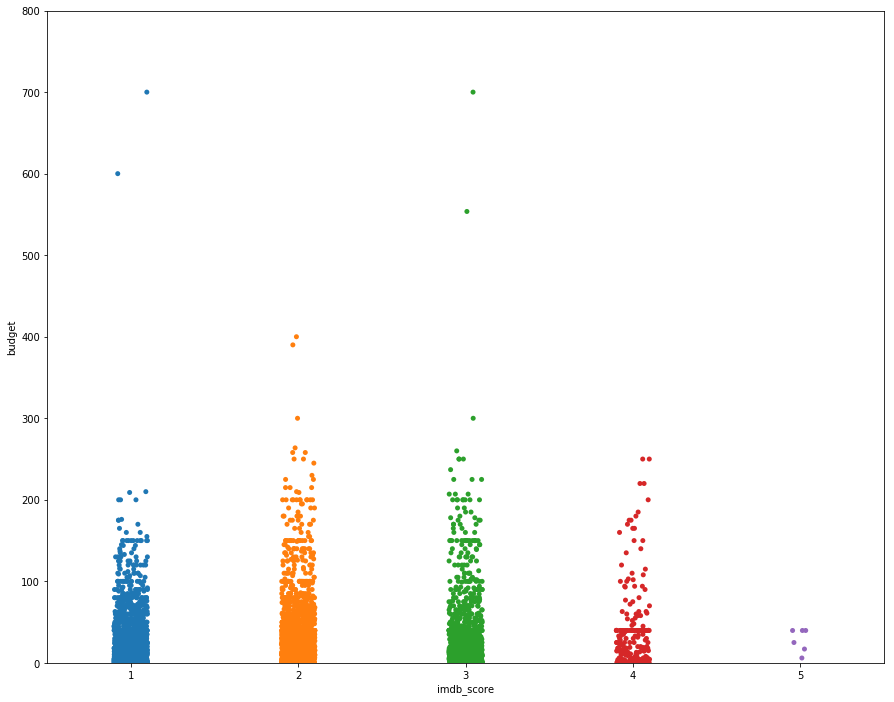

In [26]:
#classification of scaled budget values on imdb_score
plt.figure(figsize=(15,12))
sns.stripplot(df.imdb_score,df.scaled_budget,jitter=True)
plt.ylim(0,800)

## facebook_likes vs imdb_score
#### movies with high imdb_score have higher facebook likes

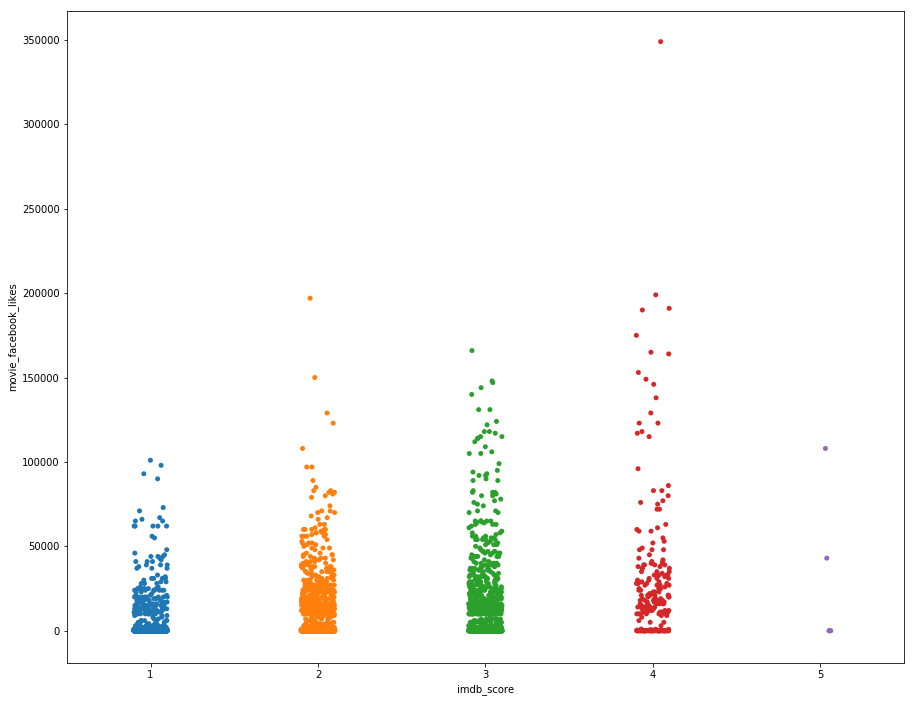

In [27]:
#classification of movies facebook likes on imdb_score
plt.figure(figsize=(15,12))
sns.stripplot(df.imdb_score,df.movie_facebook_likes,jitter=True)

## facebook_likes vs budget
#### higher budget can get you more facebook likes meaning more popularity in the public

(0, 856809.525543482)

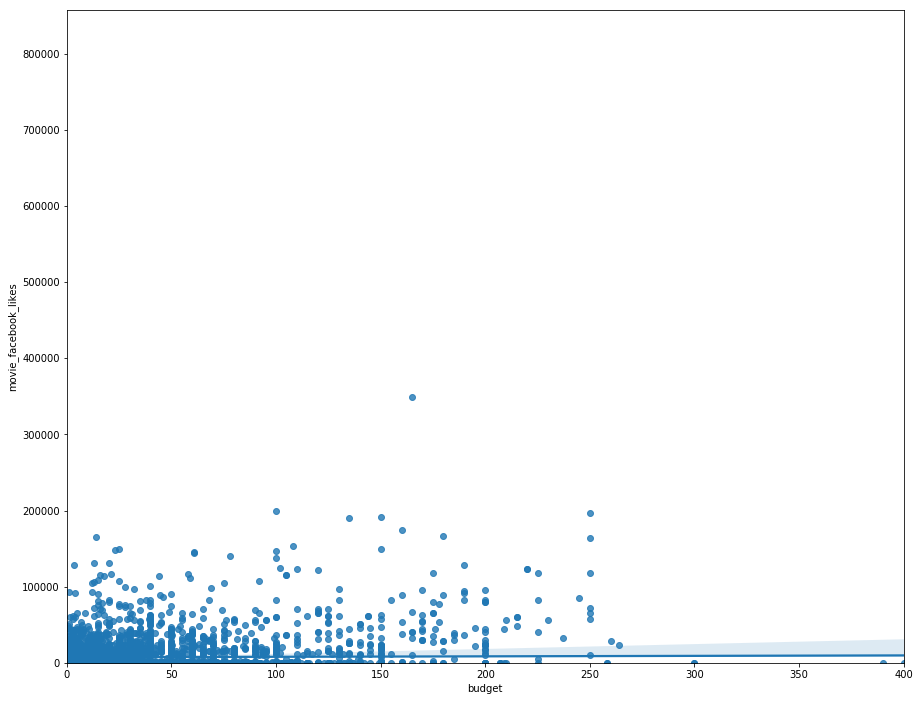

In [28]:
#regression plot of scaled gross values on movie_facebook _likes
plt.figure(figsize=(15,12))
sns.regplot(df.scaled_budget,df.movie_facebook_likes)
plt.xlim(0,400)
plt.ylim(0,None)

## facebook_likes vs scaled_gross
#### movies making more money also leads to more popularity in socail media

(0, 366583.69409563666)

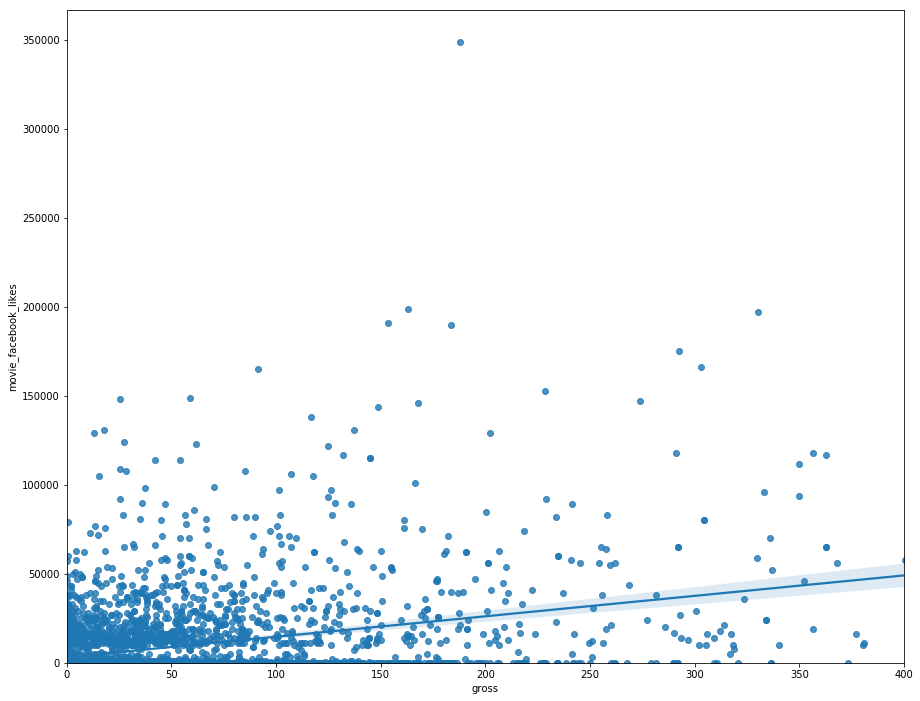

In [29]:
#movies popularity compared to gross values
plt.figure(figsize=(15,12))
sns.regplot(df.scaled_gross,df.movie_facebook_likes)
plt.xlim(0,400)
plt.ylim(0,None)

## number of critic reviews vs imdb_score
#### Even though no. of critics are higher , movies have higher imdb_score 

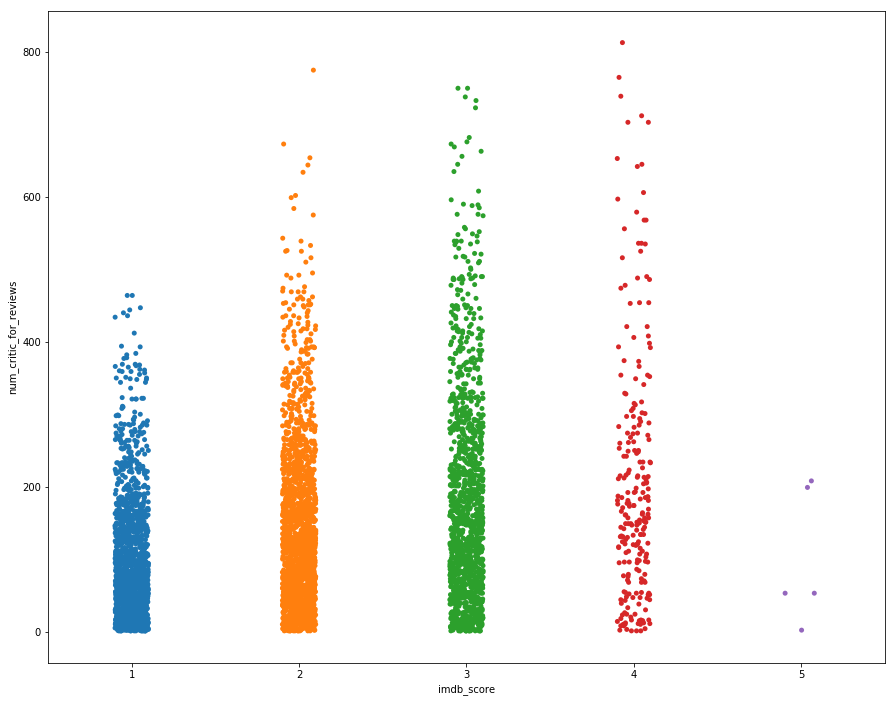

In [30]:
#classification of critic review nuber on imdb_score
plt.figure(figsize=(15,12))
sns.stripplot(df.imdb_score,df.num_critic_for_reviews,jitter=True)

## Movies based on color
#### Obviouly there are more colored movies than black and white movies.

In [31]:
# movies based on color
df.groupby('color').size()

color
 Black and White     209
Color               4815
dtype: int64

In [32]:
genre_labels = set()
for s in df['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

## Function for counting no. of times a genre occurs

In [33]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

## Count based on genres
#### Most popular genres are Drama, Comedy, Action , Romance ,Adventure

In [34]:

keyword_occurences, dum = count_word(df, 'genres', genre_labels)
keyword_occurences[:]

[['Drama', 2594],
 ['Comedy', 1872],
 ['Thriller', 1411],
 ['Action', 1153],
 ['Romance', 1107],
 ['Adventure', 923],
 ['Crime', 889],
 ['Sci-Fi', 616],
 ['Fantasy', 610],
 ['Horror', 565],
 ['Family', 546],
 ['Mystery', 500],
 ['Biography', 293],
 ['Animation', 242],
 ['Music', 214],
 ['War', 213],
 ['History', 207],
 ['Sport', 182],
 ['Musical', 132],
 ['Documentary', 121],
 ['Western', 97],
 ['Film-Noir', 6],
 ['Short', 5],
 ['News', 3],
 ['Reality-TV', 2],
 ['Game-Show', 1]]

## Cast_facebook_likes vs budget
#### Social media popularity of cast doesnot depend on the budget of the movies

(0, 4000)

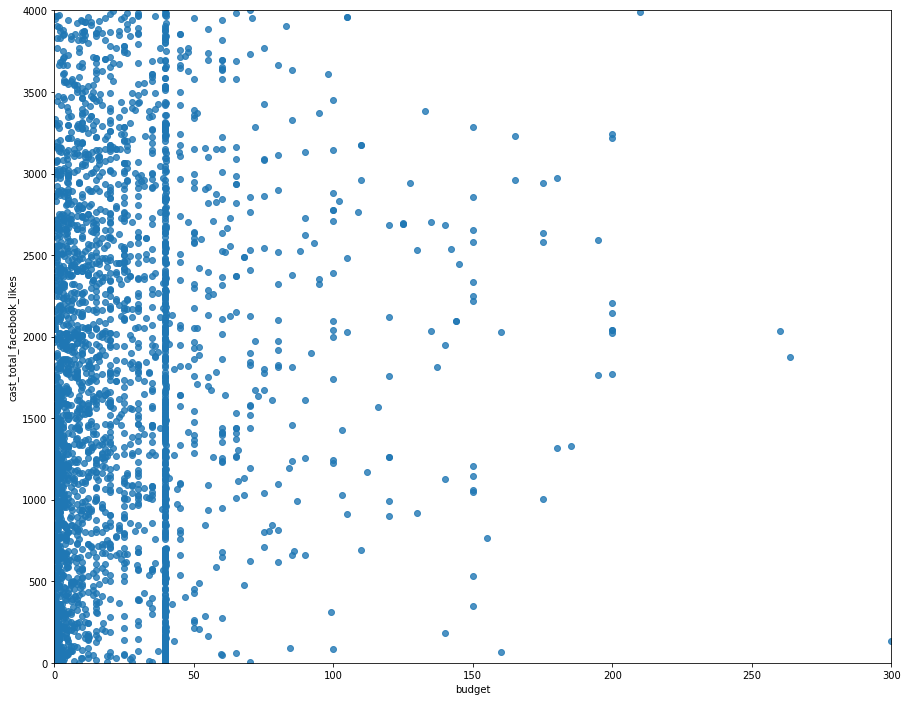

In [35]:
plt.figure(figsize=(15,12))
sns.regplot(df.scaled_budget,df.cast_total_facebook_likes)
plt.xlim(0,300)
plt.ylim(0,4000)

## Cast_facebook_likes vs scaled_gross
#### higher earning of movies doesnot make cast more popular in social media but still they are very less popular

(0, 4000)

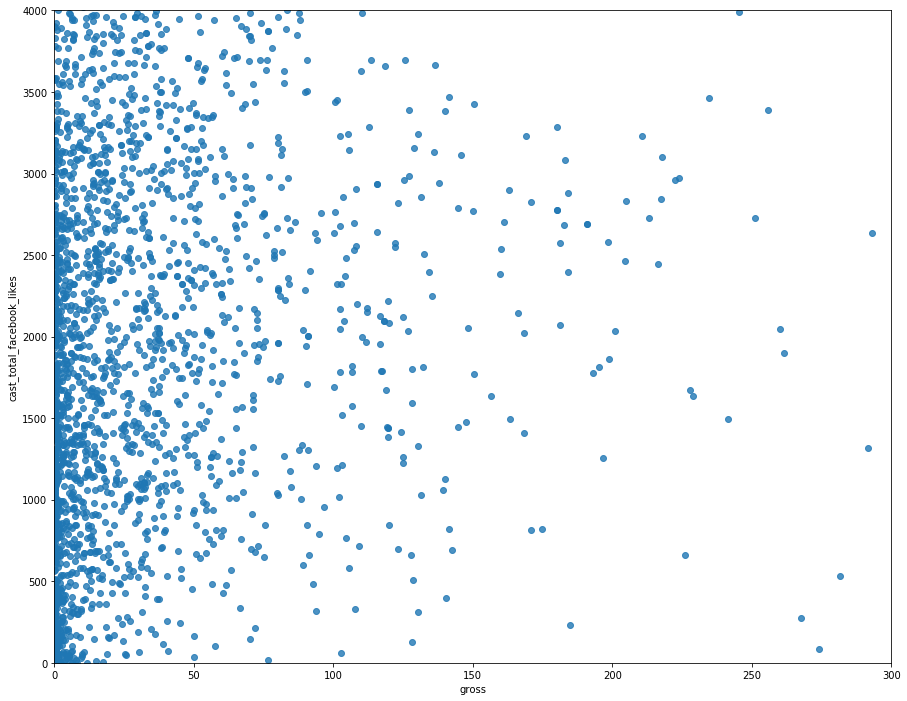

In [36]:
plt.figure(figsize=(15,12))
sns.regplot(df.scaled_gross,df.cast_total_facebook_likes)
plt.xlim(0,300)
plt.ylim(0,4000)

## Movies_Title

In [37]:
df.movie_title.head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

## Director and their movies

In [38]:
pd.crosstab(df.actor_1_name,df.movie_title,margins=True)

movie_title,#Horror,10 Cloverfield Lane,10 Days in a Madhouse,10 Things I Hate About You,"10,000 B.C.",102 Dalmatians,10th & Wolf,11:14,12 Angry Men,12 Monkeys,...,Zoolander,Zoom,Zulu,[Rec] 2,[Rec],eXistenZ,xXx: State of the Union,xXx,Æon Flux,All
actor_1_name,,,,,,,,,,,,,,,,,,,,,
50 Cent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A.J. Buckley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Aaliyah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Aasif Mandvi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abbie Cornish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Abhishek Bachchan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Abigail Evans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abigail Spencer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Adam Arkin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## no.of movies by actor1
#### we have many different actors in our data

In [39]:
df['movie_title'].groupby(df.actor_1_name).size() #no.of movies by actor1

actor_1_name
50 Cent                   1
A.J. Buckley              1
Aaliyah                   1
Aasif Mandvi              1
Abbie Cornish             3
Abhishek Bachchan         2
Abigail Evans             1
Abigail Spencer           1
Adam Arkin                2
Adam Baldwin              4
Adam Garcia               3
Adam Goldberg             5
Adam LeFevre              1
Adam Sandler             14
Adam Scott                8
Adrian Martinez           1
Adriana Barraza           1
Adriana Caselotti         1
Agnes Moorehead           1
Ahna O'Reilly             1
Aidan Quinn               5
Aidan Turner              4
Aimee Garcia              2
Aisha Tyler               1
Akon                      1
Aksel Hennie              1
Akshaye Khanna            1
Al Pacino                15
Alain Delon               1
Alan Brent                1
                         ..
Woody Allen              10
Woody Strode              1
Xander Berkeley           1
Ximena Ayala              1
Yangzom

## no. of movies of each language
#### most of our movies are in english and then we movies in european language and then others.

In [40]:
df.groupby('language').size() #

language
Aboriginal       2
Arabic           5
Aramaic          1
Bosnian          1
Cantonese       11
Chinese          3
Czech            1
Danish           5
Dari             2
Dutch            4
Dzongkha         1
English       4704
Filipino         1
French          73
German          19
Greek            1
Hebrew           5
Hindi           28
Hungarian        1
Icelandic        2
Indonesian       2
Italian         11
Japanese        18
Kannada          1
Kazakh           1
Korean           8
Mandarin        26
Maya             1
Mongolian        1
None             2
Norwegian        4
Panjabi          1
Persian          4
Polish           4
Portuguese       8
Romanian         2
Russian         11
Slovenian        1
Spanish         40
Swahili          1
Swedish          5
Tamil            1
Telugu           1
Thai             3
Urdu             1
Vietnamese       1
Zulu             2
dtype: int64

In [41]:
pd.crosstab(df.actor_1_name,df.language,margins=True) #actor vs language

language,Aboriginal,Arabic,Aramaic,Bosnian,Cantonese,Chinese,Czech,Danish,Dari,Dutch,...,Spanish,Swahili,Swedish,Tamil,Telugu,Thai,Urdu,Vietnamese,Zulu,All
actor_1_name,,,,,,,,,,,,,,,,,,,,,
50 Cent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A.J. Buckley,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Aaliyah,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Aasif Mandvi,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abbie Cornish,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
Abhishek Bachchan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Abigail Evans,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Abigail Spencer,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Adam Arkin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


## histogram of budget

/home/aditya/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 300)

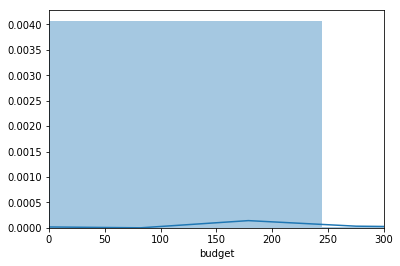

In [42]:
sns.distplot(df.scaled_budget) #histogram of budget
plt.xlim(0,300)

## movies with their imdb_scores

In [43]:

df[['movie_title','language','imdb_score']].head()

,movie_title,language,imdb_score
0,Avatar,English,3
1,Pirates of the Caribbean: At World's End,English,3
2,Spectre,English,2
3,The Dark Knight Rises,English,4
4,Star Wars: Episode VII - The Force Awakens ...,NaN,3


## movies with their budget and gross

In [44]:

df[['movie_title','budget','gross']].head()

,movie_title,budget,gross
0,Avatar,237000000,760505847.0
1,Pirates of the Caribbean: At World's End,300000000,309404152.0
2,Spectre,245000000,200074175.0
3,The Dark Knight Rises,250000000,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,39752620,NaN


## movies with their actor names

In [45]:

df[['movie_title','actor_1_name','actor_2_name','actor_3_name']].head()

,movie_title,actor_1_name,actor_2_name,actor_3_name
0,Avatar,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,Doug Walker,Rob Walker,NaN


## movies name with actors and director and social media popularity

In [46]:

df[['movie_title','movie_facebook_likes','actor_1_name','actor_1_facebook_likes','actor_2_name','actor_2_facebook_likes','actor_3_name','actor_3_facebook_likes','director_name','director_facebook_likes']].head()

,movie_title,movie_facebook_likes,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,director_name,director_facebook_likes
0,Avatar,33000,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,James Cameron,0.0
1,Pirates of the Caribbean: At World's End,0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,Gore Verbinski,563.0
2,Spectre,85000,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,Sam Mendes,0.0
3,The Dark Knight Rises,164000,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,Christopher Nolan,22000.0
4,Star Wars: Episode VII - The Force Awakens ...,0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,Doug Walker,131.0


## movies with their content_rating

In [47]:

df[['movie_title','content_rating']].head()

,movie_title,content_rating
0,Avatar,PG-13
1,Pirates of the Caribbean: At World's End,PG-13
2,Spectre,PG-13
3,The Dark Knight Rises,PG-13
4,Star Wars: Episode VII - The Force Awakens ...,NaN


## movies with their genres

In [48]:

df[['movie_title','genres']].head()

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,Star Wars: Episode VII - The Force Awakens ...,Documentary


## movies with their duration

In [49]:
#
df[['movie_title','duration']].head()

,movie_title,duration
0,Avatar,178.0
1,Pirates of the Caribbean: At World's End,169.0
2,Spectre,148.0
3,The Dark Knight Rises,164.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN


## movies with their plotkeywords

In [50]:

df[['movie_title','plot_keywords']].head()

,movie_title,plot_keywords
0,Avatar,avatar|future|marine|native|paraplegic
1,Pirates of the Caribbean: At World's End,goddess|marriage ceremony|marriage proposal|pi...
2,Spectre,bomb|espionage|sequel|spy|terrorist
3,The Dark Knight Rises,deception|imprisonment|lawlessness|police offi...
4,Star Wars: Episode VII - The Force Awakens ...,NaN
